In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv("train.csv")
ex=pd.read_csv("sample_submission.csv")

In [4]:
df['order_completed_at'] = pd.to_datetime(df['order_completed_at'])



In [5]:
df.head()

,user_id,order_completed_at,cart
0,2,2015-03-22 09:25:46,399
1,2,2015-03-22 09:25:46,14
2,2,2015-03-22 09:25:46,198
3,2,2015-03-22 09:25:46,88
4,2,2015-03-22 09:25:46,157


In [6]:
ex.head()

,id,target
0,0;133,0
1,0;5,1
2,0;10,0
3,0;396,1
4,0;14,0


In [7]:
ex

,id,target
0,0;133,0
1,0;5,1
2,0;10,0
3,0;396,1
4,0;14,0
...,...,...
790444,19998;26,0
790445,19998;31,0
790446,19998;29,1
790447,19998;798,1


In [8]:
num_unique_combinations = df[['cart', 'user_id']].drop_duplicates().shape[0]
print("Количество уникальных сочетаний cart и user_id:", num_unique_combinations)



Количество уникальных сочетаний cart и user_id: 1117600


In [10]:
tf=df.drop('order_completed_at', axis=1)   # Удаляем столбец 'order_completed_at'
tf = tf[['cart', 'user_id']].drop_duplicates() # Выбираем только столбцы 'cart' и 'user_id' и удаляем дублирующиеся строки
tf

,cart,user_id
0,399,2
1,14,2
2,198,2
3,88,2
4,157,2
...,...,...
3123042,412,12702
3123044,423,12702
3123048,439,12702
3123060,92,12702


In [11]:
df.describe()


,user_id,cart
count,3.123064e+06,3.123064e+06
mean,7.253373e+03,2.273235e+02
std,5.337838e+03,2.112867e+02
min,0.000000e+00,0.000000e+00
25%,2.884000e+03,4.200000e+01
50%,6.055000e+03,1.460000e+02
75%,1.117200e+04,3.990000e+02
max,1.999900e+04,8.800000e+02


In [12]:
df['year'] = df['order_completed_at'].dt.year
df['month'] = df['order_completed_at'].dt.month
df['day'] = df['order_completed_at'].dt.day
df['hour'] = df['order_completed_at'].dt.hour
df['minute'] = df['order_completed_at'].dt.minute
df['second'] = df['order_completed_at'].dt.second
df=df.drop('order_completed_at', axis=1)
df.head()

,user_id,cart,year,month,day,hour,minute,second
0,2,399,2015,3,22,9,25,46
1,2,14,2015,3,22,9,25,46
2,2,198,2015,3,22,9,25,46
3,2,88,2015,3,22,9,25,46
4,2,157,2015,3,22,9,25,46


In [13]:
df['target'] = 0

In [14]:
df.loc[df.duplicated(subset=['user_id', 'cart'], keep=False), 'target'] = 1

In [15]:
df


,user_id,cart,year,month,day,hour,minute,second,target
0,2,399,2015,3,22,9,25,46,0
1,2,14,2015,3,22,9,25,46,0
2,2,198,2015,3,22,9,25,46,1
3,2,88,2015,3,22,9,25,46,1
4,2,157,2015,3,22,9,25,46,1
...,...,...,...,...,...,...,...,...,...
3123059,12702,441,2020,9,3,23,45,45,1
3123060,12702,92,2020,9,3,23,45,45,0
3123061,12702,431,2020,9,3,23,45,45,1
3123062,12702,24,2020,9,3,23,45,45,1


<AxesSubplot:xlabel='target', ylabel='count'>

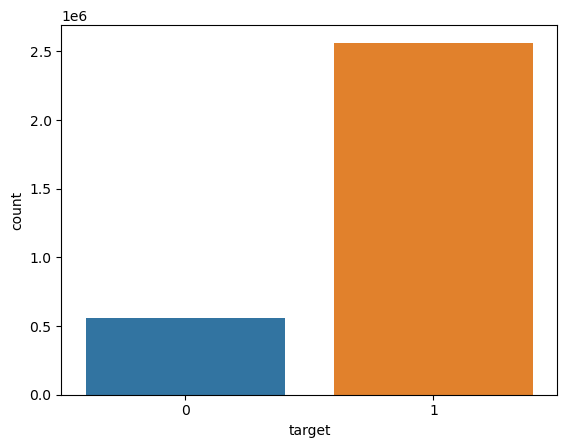

In [16]:
sns.countplot(x='target',data=df)

In [64]:
from sklearn.utils import resample

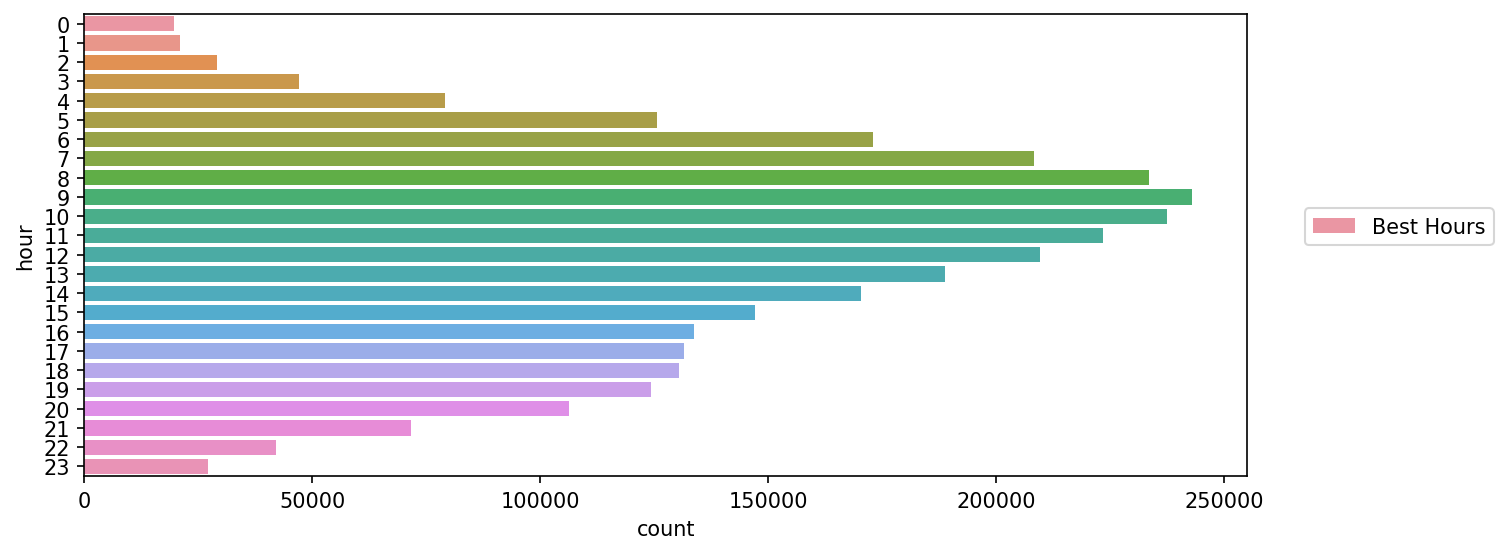

In [17]:
plt.figure(figsize=(10, 4), dpi=150)

# Создание столбчатой диаграммы с использованием seaborn
sns.countplot(data=df,  y='hour', label='Best Hours')

# Добавление легенды с указанием расположения
plt.legend(loc=(1.05, 0.5))

# Отображение диаграммы
plt.show()

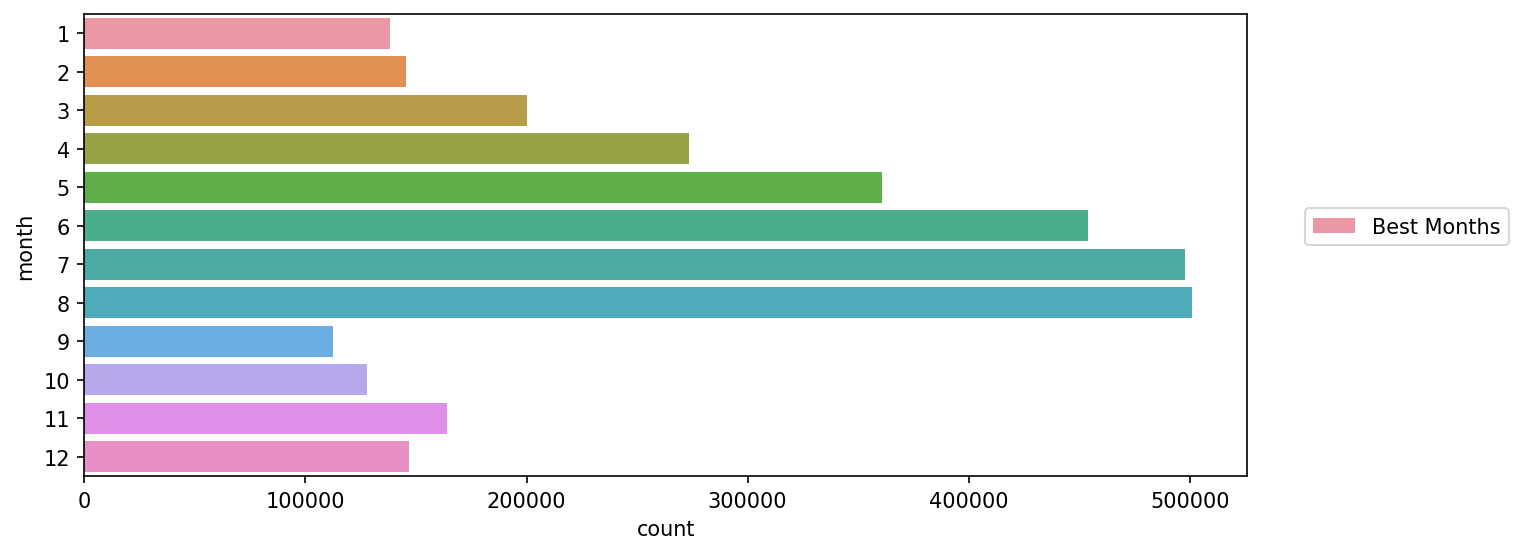

In [18]:
plt.figure(figsize=(10, 4), dpi=150)

# Создание столбчатой диаграммы с использованием seaborn
sns.countplot(data=df,  y='month', label='Best Months')

# Добавление легенды с указанием расположения
plt.legend(loc=(1.05, 0.5))

# Отображение диаграммы
plt.show()

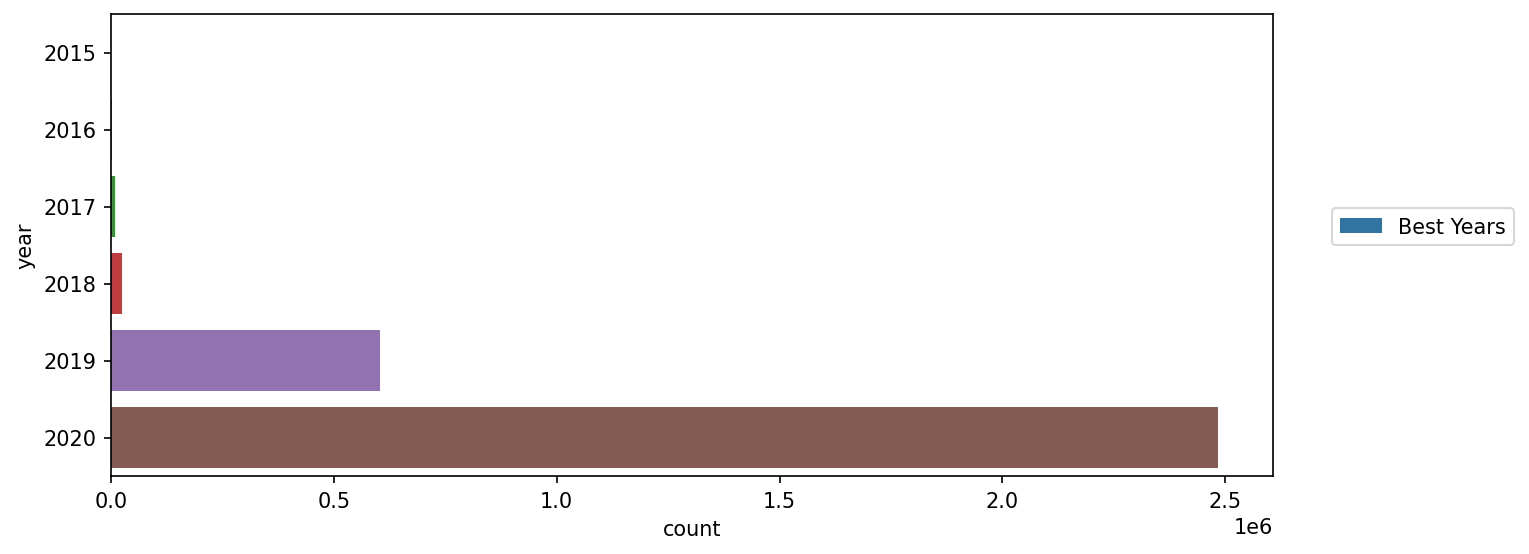

In [19]:
plt.figure(figsize=(10, 4), dpi=150)

# Создание столбчатой диаграммы с использованием seaborn
sns.countplot(data=df,  y='year', label='Best Years')

# Добавление легенды с указанием расположения
plt.legend(loc=(1.05, 0.5))

# Отображение диаграммы
plt.show()

In [20]:
# Разделение данных на два DataFrame по значению 'target'
df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]

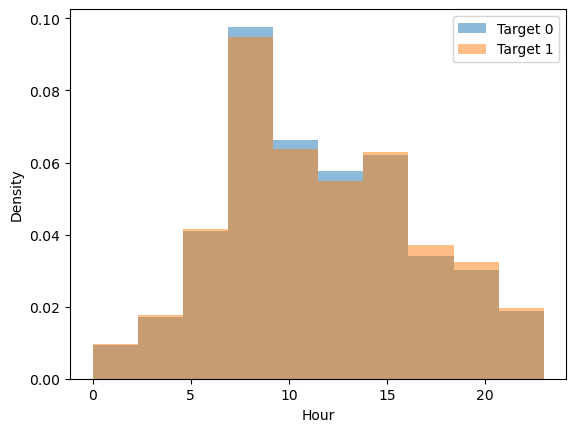

In [21]:
# Создание двух графиков, наложенных друг на друга
plt.hist(df_0['hour'], bins=10, alpha=0.5, label='Target 0', density=True)
plt.hist(df_1['hour'], bins=10, alpha=0.5, label='Target 1', density=True)
# Добавление легенды и меток осей
plt.legend()
plt.xlabel('Hour')
plt.ylabel('Density')

# Отображение графиков
plt.show()

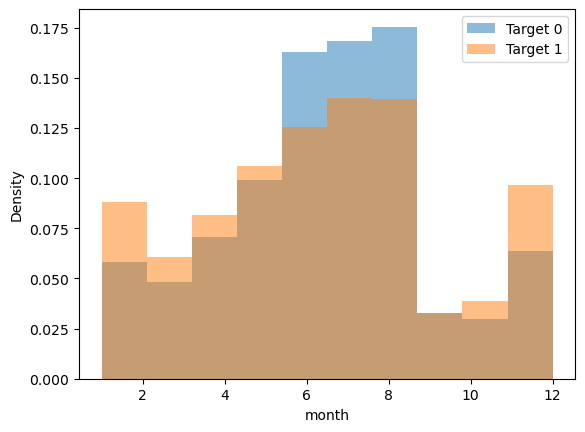

In [22]:
# Создание двух графиков, наложенных друг на друга
plt.hist(df_0['month'], bins=10, alpha=0.5, label='Target 0', density=True)
plt.hist(df_1['month'], bins=10, alpha=0.5, label='Target 1', density=True)
# Добавление легенды и меток осей
plt.legend()
plt.xlabel('month')
plt.ylabel('Density')

# Отображение графиков
plt.show()

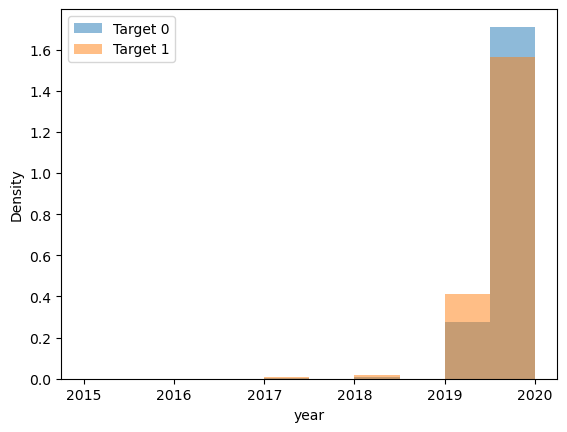

In [23]:
# Создание двух графиков, наложенных друг на друга
plt.hist(df_0['year'], bins=10, alpha=0.5, label='Target 0', density=True)
plt.hist(df_1['year'], bins=10, alpha=0.5, label='Target 1', density=True)
# Добавление легенды и меток осей
plt.legend()
plt.xlabel('year')
plt.ylabel('Density')

# Отображение графиков
plt.show()

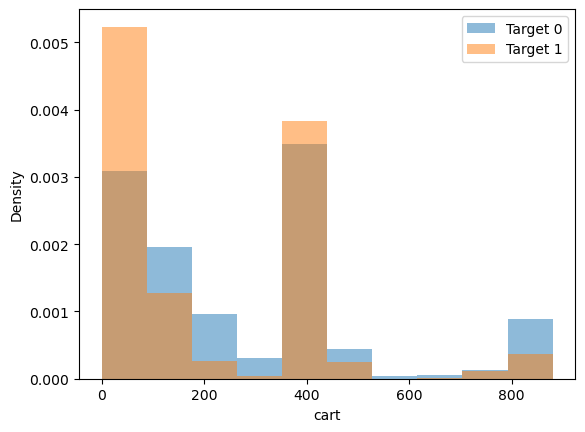

In [24]:
# Создание двух графиков, наложенных друг на друга
plt.hist(df_0['cart'], bins=10, alpha=0.5, label='Target 0', density=True)
plt.hist(df_1['cart'], bins=10, alpha=0.5, label='Target 1', density=True)
# Добавление легенды и меток осей
plt.legend()
plt.xlabel('cart')
plt.ylabel('Density')

# Отображение графиков
plt.show()

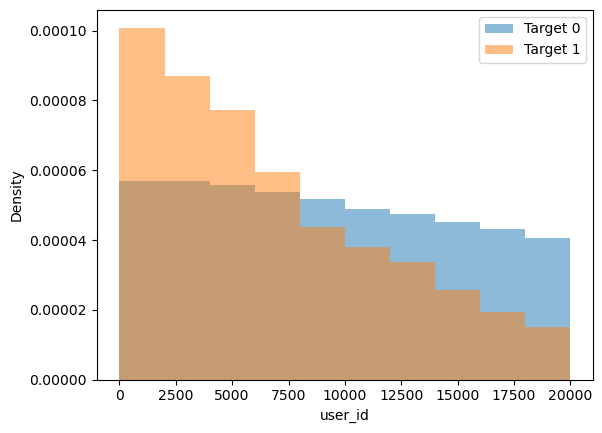

In [25]:
# Создание двух графиков, наложенных друг на друга
plt.hist(df_0['user_id'], bins=10, alpha=0.5, label='Target 0', density=True)
plt.hist(df_1['user_id'], bins=10, alpha=0.5, label='Target 1', density=True)
# Добавление легенды и меток осей
plt.legend()
plt.xlabel('user_id')
plt.ylabel('Density')

# Отображение графиков
plt.show()

In [ ]:
#По данным графиков можно понять что наши данные крайне несбалнсированны,
#что ведет нас к плохим значением при предсказаниях, ниже я пытаюсь сбалансировать наши данные

#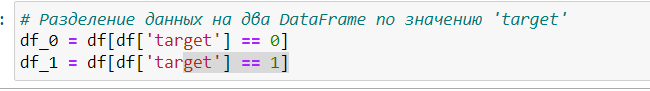


In [66]:
df_0_unsample = resample(df_0,
             replace=True,
             n_samples=len(df_1),
             random_state=42)

print(df_0_unsample.shape)

(2562466, 9)


In [67]:
df_upsampled = pd.concat([df_1, df_0_unsample])

In [68]:
print(df_upsampled["target"].value_counts())



1    2562466
0    2562466
Name: target, dtype: int64


<AxesSubplot:ylabel='Type'>

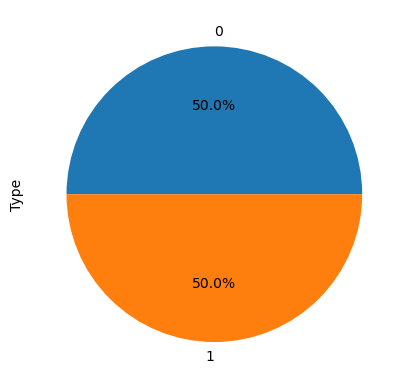

In [70]:
df_upsampled.groupby('target').size().plot(kind='pie',
                                       y = "target",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [71]:
df=df_upsampled

In [72]:
df.corr()

,user_id,cart,year,month,day,hour,minute,second,target
user_id,1.000000,0.005474,0.423148,0.010216,0.010883,-0.040022,0.000302,0.001164,-0.229503
cart,0.005474,1.000000,0.002438,-0.002724,0.000585,0.001059,0.000394,0.000431,-0.139849
year,0.423148,0.002438,1.000000,-0.553320,-0.025078,-0.050372,0.001505,0.001003,-0.094898
month,0.010216,-0.002724,-0.553320,1.000000,-0.032745,0.019380,-0.003920,0.002352,-0.017941
day,0.010883,0.000585,-0.025078,-0.032745,1.000000,0.002565,0.000447,0.001320,-0.002038
hour,-0.040022,0.001059,-0.050372,0.019380,0.002565,1.000000,-0.049239,-0.003001,0.012118
minute,0.000302,0.000394,0.001505,-0.003920,0.000447,-0.049239,1.000000,0.005663,0.000916
second,0.001164,0.000431,0.001003,0.002352,0.001320,-0.003001,0.005663,1.000000,-0.001524
target,-0.229503,-0.139849,-0.094898,-0.017941,-0.002038,0.012118,0.000916,-0.001524,1.000000


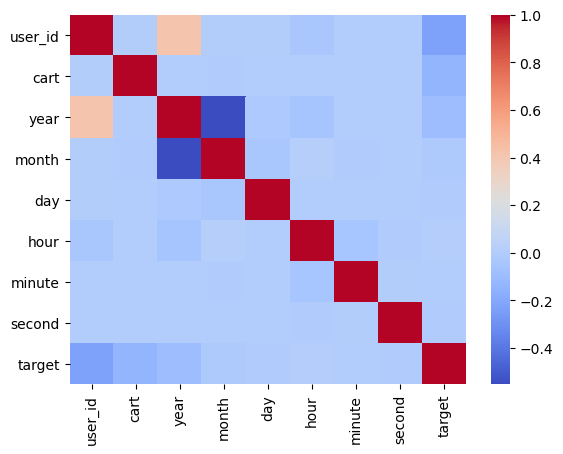

In [73]:

# Вычисление матрицы корреляции
corr_matrix = df.corr()

# Создание тепловой карты корреляции
sns.heatmap(corr_matrix, cmap='coolwarm')

# Отображение тепловой карты
plt.show()

In [ ]:
#значит нет большого смысла в признаках времени, они почти не влияют на целевое значение

In [117]:
df=df.drop(['hour','minute','second','day','year','month'],axis=1)

In [28]:
from sklearn.model_selection import train_test_split

In [118]:

X = df.drop('target',axis=1)
y = df['target']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
from sklearn.model_selection import GridSearchCV

In [120]:
n_estimators=[2,3,4,5,10]
max_features= [2,3]


In [121]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             }  # oob_score имеет смысл только при bootstrap=True!

In [124]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [125]:
grid.fit(X_train,y_train)     

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3],
                         'n_estimators': [2, 3, 4, 5, 10]})

In [126]:

grid.best_params_

{'max_features': 2, 'n_estimators': 10}

In [127]:
y_pred = grid.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [128]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96    767364
           1       0.98      0.95      0.96    770116

    accuracy                           0.96   1537480
   macro avg       0.96      0.96      0.96   1537480
weighted avg       0.96      0.96      0.96   1537480



In [129]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9626200015609959

In [130]:
confusion_matrix(y_test,y_pred)

array([[752249,  15115],
       [ 42356, 727760]], dtype=int64)

In [ ]:
#это мы посмотрели что выйдет при использовании метода случайных деревьев

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
params_grid = {"n_estimators":[1,5,10,50,100,],'max_depth':[3,4,5]}

In [90]:
gb_model = GradientBoostingClassifier()

In [91]:
grids = GridSearchCV(gb_model,param_grid)

In [92]:
grids.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_features': [2], 'n_estimators': [2, 3, 4, 5, 10]})

In [93]:
grids.best_params_

{'max_features': 2, 'n_estimators': 10}

In [102]:
predictions = grids.predict(X_test)

In [103]:
confusion_matrix(y_test,predictions)

array([[486506, 283432],
       [255528, 512014]], dtype=int64)

In [104]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.63      0.64    769938
           1       0.64      0.67      0.66    767542

    accuracy                           0.65   1537480
   macro avg       0.65      0.65      0.65   1537480
weighted avg       0.65      0.65      0.65   1537480



In [105]:
accuracy_1 = accuracy_score(y_test,predictions)
accuracy_1

0.6494523505996826

In [ ]:
#В целом метод случайного леса показал себя лучше

In [144]:
ex

,id,target
0,0;133,0
1,0;5,1
2,0;10,0
3,0;396,1
4,0;14,0
...,...,...
790444,19998;26,0
790445,19998;31,0
790446,19998;29,1
790447,19998;798,1


In [145]:
# Разделение значения в колонке 'id' и создание нового DataFrame
new_df = pd.DataFrame(ex['id'].str.split(';').tolist(), columns=['user_id', 'cart'])


In [146]:
new_df

,user_id,cart
0,0,133
1,0,5
2,0,10
3,0,396
4,0,14
...,...,...
790444,19998,26
790445,19998,31
790446,19998,29
790447,19998,798


In [147]:
final_prediction=grid.predict(new_df)


In [148]:
final_prediction

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [151]:
ex=ex.drop('target',axis=1)

In [152]:
ex = ex.assign(target=final_prediction)


In [153]:
ex

,id,target
0,0;133,0
1,0;5,0
2,0;10,0
3,0;396,0
4,0;14,1
...,...,...
790444,19998;26,0
790445,19998;31,0
790446,19998;29,0
790447,19998;798,0


In [154]:
ex.to_csv('final_df.csv', index=False)


In [ ]:
#Сделано!